### GPT 3 - daVinci 003

### Import necessary libraries and modules to work

In [1]:
# import necessary libraries
import requests
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#### Load the data and set your OpenAI API key

In [2]:
# Set your OpenAI API key
api_key = 'your-openai-api-key'

# Load your csv data
csv_path = r'location-of-file'
df = pd.read_csv(csv_path)

In [29]:
df= df.head(200)
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


#### Define your prompt and generate prediction for single data for testing

In [13]:
# Define the prompt for sentiment prediction
prompt = "Given the text, predict the sentiment as either positive, negative or neutral:"

# generate pridiction for single data
text = df['text'][9]

test_payload = {
        "model": "text-davinci-003",
        "prompt": f"{prompt} {text}",
        "max_tokens": 100
    }

test_url = "https://api.openai.com/v1/completions"
test_headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

test_response = requests.post(test_url, json=test_payload, headers=test_headers)
test_data = test_response.json()
predictions = test_data['choices'][0]['text'].strip()
predictions

'Positive'

#### Define the prompt and generate predeiction for the whole dataset

In [15]:
# Define the prompt for sentiment prediction
prompt = "Given the text, predict the sentiment as either positive, negative or neutral:"

# Generate predictions for the entire dataset
predictions = []

for text in df['text']:
    test_payload = {
        "model": "text-davinci-003",
        "prompt": f"{prompt} {text}",
        "max_tokens": 100
    }

    test_url = "https://api.openai.com/v1/completions"
    test_headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    test_response = requests.post(test_url, json=test_payload, headers=test_headers)
    test_data = test_response.json()
    predictions.append(test_data['choices'][0]['text'].strip())
    

#### format the predictions to compare the with actual values

In [23]:
lowered_predictions = []
for word in predictions:
    new_word = word.lower()
    if new_word != 'positive' and new_word != 'negative':
        new_word = 'neutral'
    lowered_predictions.append(new_word)

#### Evaluate the model and print the evaluation metricses

In [24]:
# Evaluate the model
actual_labels = df['sentiment']
accuracy = accuracy_score(actual_labels, lowered_predictions)
precision = precision_score(actual_labels, lowered_predictions, average='weighted')
f1 = f1_score(actual_labels, lowered_predictions, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.57
Precision: 0.63
F1 Score: 0.56


#### Display performance metrices using bar graph

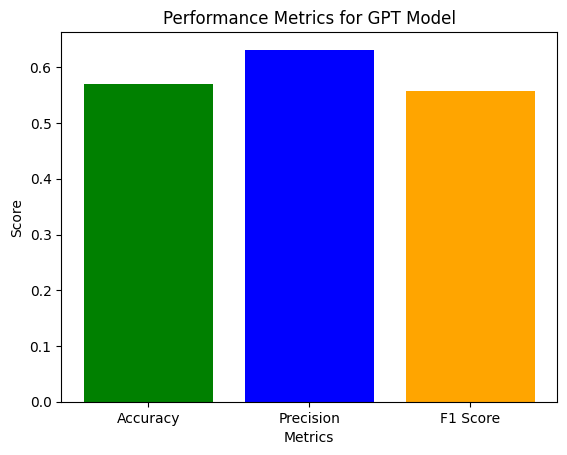

In [31]:
# Labels for the bars
labels = ['Accuracy', 'Precision', 'F1 Score']

# Values for the bars
values = [accuracy, precision, f1]

# Bar colors
colors = ['green', 'blue', 'orange']

# Create a bar graph
plt.bar(labels, values, color=colors)

# Adding title and labels
plt.title('Performance Metrics for GPT Model')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Display the bar graph
plt.show()


#### Print classification report

In [25]:
print("Classification Report for Validation Set:")
print(classification_report(actual_labels, lowered_predictions))
#ConfusionMatrixDisplay.from_estimator(text_clf, X_val, actual_labels).plot()

Classification Report for Validation Set:
              precision    recall  f1-score   support

    negative       0.76      0.34      0.47        64
     neutral       0.49      0.79      0.61        82
    positive       0.69      0.50      0.58        54

    accuracy                           0.57       200
   macro avg       0.65      0.55      0.55       200
weighted avg       0.63      0.57      0.56       200

